Temple simulado
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

## Función a optimizar

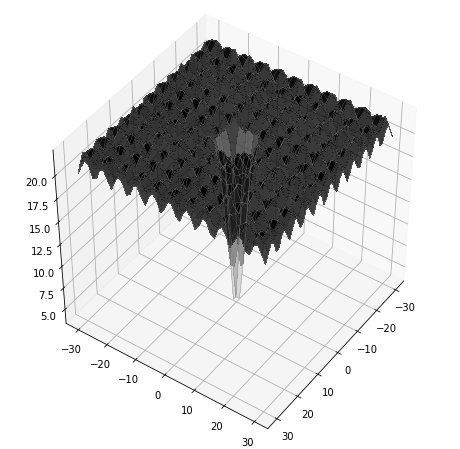

In [1]:
from EAOS.benchmarks import Ackley

fn = Ackley(n_dim=2)
fn.plot_surface()

## Algoritmo

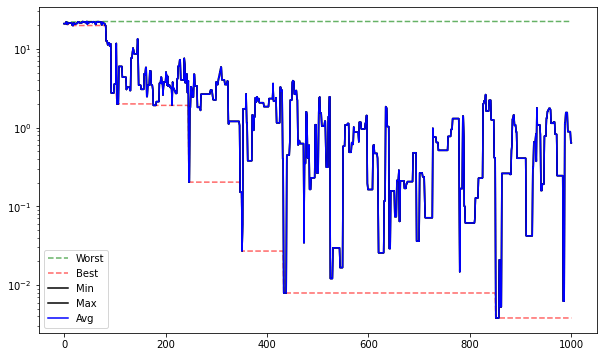

In [2]:
from EAOS.algorithms import LocalSearch, SimulatedAnnealing
from EAOS.fnevaluator import FnEvaluator
from EAOS.generators import RandomUniform
from EAOS.monitor import Monitor

monte_carlo = RandomUniform(
    pop_size=1,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)
evaluator = FnEvaluator(fn)
monitor = Monitor()

optimizer = SimulatedAnnealing(
    fn=fn,
    t_init=5,
    t_min=0.5,
    M=500,
    seed=123456,
)


solutions = monte_carlo()
solutions = evaluator(solutions)
monitor(solutions)

NITER = 1000

for iter in range(NITER):
    solutions = optimizer(solutions)
    monitor(solutions)

monitor.plot_stats()

In [3]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([ 0.00851166, -0.00774954]), 0.003816761849916972)

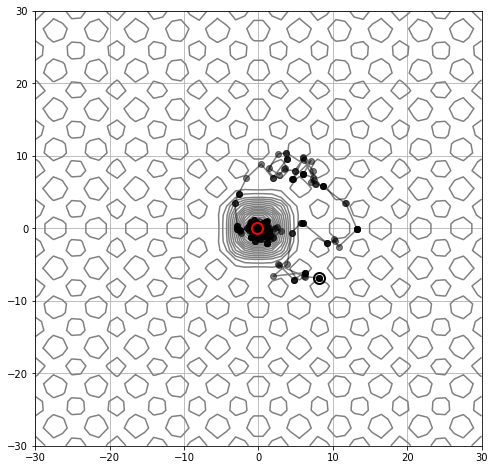

In [4]:
#
# Trayectoria del punto inicial al punto final
#
fn.plot_trayectory(monitor)

## Experimento 1: Impacto de la velocidad de enfriamiento

100% (60 of 60) |########################| Elapsed Time: 0:02:44 Time:  0:02:44


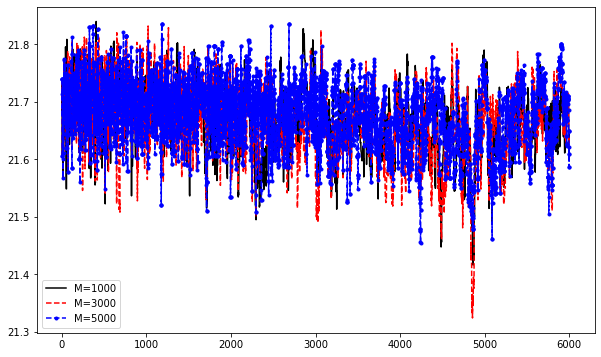

In [5]:
import progressbar

NITER = 6000
NRUNS = 20
MVALUES = [1000, 3000, 5000]


fn = Ackley(n_dim=20)
monitors = []

evaluator = FnEvaluator(fn)

max_value = len(MVALUES) * NRUNS

counter = 0
with progressbar.ProgressBar(max_value=max_value) as bar:

    for M in MVALUES:

        #
        # Genera siempre la misma solución inicial
        #
        monte_carlo = RandomUniform(
            pop_size=1,
            low=fn.LB,
            high=fn.UB,
            seed=123456,
        )

        monitor = Monitor()

        for i_run in range(NRUNS):

            monitor.new_run()

            optimizer = SimulatedAnnealing(
                fn=fn,
                t_init=5,
                t_min=0.5,
                M=M,
                seed=123456,
            )

            solutions = monte_carlo()
            solutions = evaluator(solutions)
            monitor(solutions)

            for iter in range(NITER):
                solutions = optimizer(solutions)
                monitor(solutions)

            counter += 1
            bar.update(counter)

        monitors.append(monitor)

#
# Imprime los resultados
#
from EAOS.monitor import plot_performance

plot_performance(monitors, legends=["M={}".format(M) for M in MVALUES])

## Experimento 2: Radio inicial de busqueda

100% (100 of 100) |######################| Elapsed Time: 0:03:23 Time:  0:03:23


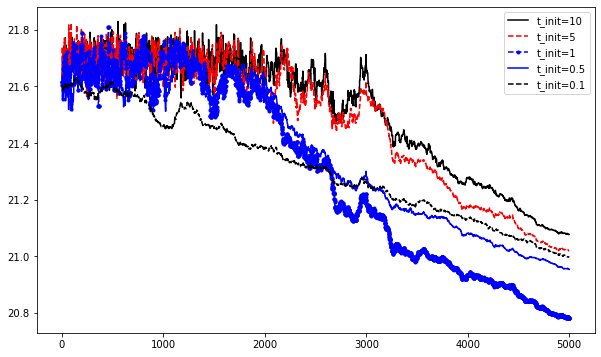

In [6]:
NITER = 5000
NRUNS = 20
T_INIT = [10, 5, 1, 0.5, 0.1]

fn = Ackley(n_dim=20)
monitors = []

evaluator = FnEvaluator(fn)

max_value = len(T_INIT) * NRUNS

counter = 0
with progressbar.ProgressBar(max_value=max_value) as bar:

    for t_init in T_INIT:

        #
        # Genera siempre la misma solución inicial
        #
        monte_carlo = RandomUniform(
            pop_size=1,
            low=fn.LB,
            high=fn.UB,
            seed=123456,
        )

        monitor = Monitor()

        for i_run in range(NRUNS):

            monitor.new_run()

            optimizer = SimulatedAnnealing(
                fn=fn,
                t_init=t_init,
                t_min=0.01,
                M=5000,
                seed=123456,
            )

            solutions = monte_carlo()
            solutions = evaluator(solutions)
            monitor(solutions)

            for iter in range(NITER):
                solutions = optimizer(solutions)
                monitor(solutions)

            counter += 1
            bar.update(counter)

        monitors.append(monitor)

#
# Imprime los resultados
#
from EAOS.monitor import plot_performance

plot_performance(monitors, legends=["t_init={}".format(t) for t in T_INIT])